In [1]:
# Imports
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Simulación

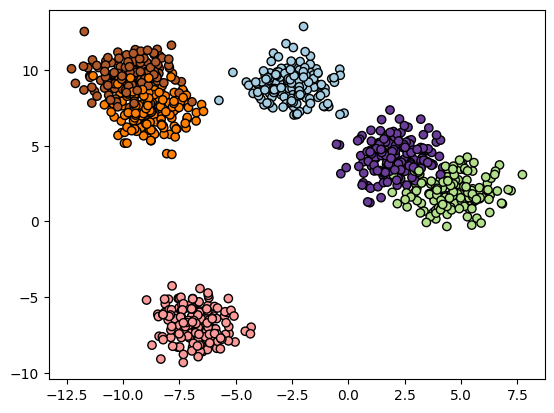

In [81]:
x, gt = make_blobs(n_samples=1000, centers=6, n_features=2,random_state=42)
gt = gt.reshape((len(gt), 1))
plt.scatter(x[:,0], x[:,1], c=gt, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.show()

In [48]:
x

array([[-6.49942934, -6.26952385],
       [ 3.23236714,  1.195353  ],
       [-8.06662905,  4.47498029],
       ...,
       [-9.44783996,  7.13655161],
       [-6.91461568, -5.10930896],
       [ 3.04636276,  4.75397851]])

In [49]:
x.shape

(1000, 2)

In [50]:
gt[0:5] ## Mostrar solo los 5 primeros

array([[2],
       [1],
       [3],
       [2],
       [5]])

## programación de perceptrón

In [51]:
import pandas as pd
X = np.array([1,2,3,4,5,6]).reshape(3,2)
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [8]:
for i, j in enumerate(X):
  print(i,j)

0 [1 2]
1 [3 4]
2 [5 6]


In [103]:
import numpy as np
import json
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate, n_iters):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)  
        n_samples, n_features = X.shape
        n_classes = len(self.classes)
        
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)

        for clases, c in enumerate(self.classes):
            y_2 = np.where(y == c, 1, 0)  
            
            for _ in range(self.n_iters):
                for i, x_i in enumerate(X):
                    linear_output = np.dot(x_i, self.weights[clases]) + self.bias[clases]
                    y_predicted = self.activation_func(linear_output)

                    update = self.lr * (y_2[i] - y_predicted)
                    self.weights[clases] += update * x_i
                    self.bias[clases] += update.item() if np.ndim(update) > 0 else update

    def predict(self, X):
        
        linear_outputs = [np.dot(X, w) + b for w, b in zip(self.weights, self.bias)]
        y_predicted = np.argmax(linear_outputs, axis=0)
        return self.classes[y_predicted]

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def save_model(self, file_path):
        model_data = {
            "weights": self.weights.tolist(),
            "bias": self.bias.tolist(),
            "classes": self.classes.tolist()
        }

        with open(file_path, 'w') as json_file:
            json.dump(model_data, json_file)

    @classmethod
    def load_model(cls, file_path):
        with open(file_path, 'r') as json_file:
            model_data = json.load(json_file)

        perceptron = cls(input_size=len(model_data["weights"]))
        perceptron.weights = np.array(model_data["weights"])
        perceptron.bias = np.array(model_data["bias"])
        perceptron.classes = np.array(model_data["classes"])

        return perceptron

    def plot_decision_boundary(self, X, y, title="Perceptron Decision Boundary"):
        #plt.figure(figsize=(8, 6))

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')

        x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
        y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

        plt.title(title)
        plt.xlabel('class 1')
        plt.ylabel('class 2')
        plt.show()



In [99]:
## tasa de aprendizaje: 0.01
## iteraciones: 100
perceptron=Perceptron(0.01, 100)
perceptron.fit(x,gt)

In [100]:
perceptron.weights

array([[ 0.29274691,  0.6956789 ],
       [ 0.33000448, -0.15389542],
       [-0.02569886, -0.12061068],
       [-0.14671719,  0.03680617],
       [ 0.0463202 ,  0.01954578],
       [-0.21862916,  0.50588242]])

In [101]:
perceptron.bias

array([-4.22, -0.35, -0.01, -1.32, -0.3 , -6.66])

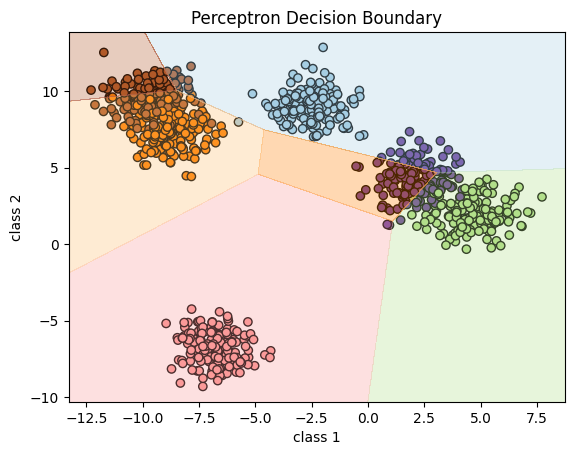

In [102]:
perceptron.plot_decision_boundary(x,gt)

In [57]:
perceptron.predict(np.array([6.5, 4.5]))

1

In [32]:
perceptron.predict(np.array([-3, -10]))

2

In [33]:
perceptron.predict(np.array([7.6, -10]))

1

In [31]:
perceptron.predict(np.array([-12, 10]))

3

## Predicciones y performance del modelo

In [58]:
yhat = perceptron.predict(x)

In [59]:
y = np.array(gt, dtype=float)  # Convierte gt directamente a float


In [60]:
print(accuracy_score(y,yhat))

0.783
